# Data engineering simulations data into campaign data

author: steeve.laquitaine@epfl.ch

**In brief**: 
* One simulation (produced by a single `BlueConfig`) is chunked into N pieces each treated by a different computer process with a rank id, such that each piece can fit into runtime memory to extract traces and spikes data.
* For multiple simulations (several `BlueConfig`), this is done parallelly by `old/mergeExtracellularReports_batch.py` on the cluster.
* For a single simulation, it can be done sequentially by running `chunking.py` module

### Chunking 4 secs simulations into 133 ms chunks

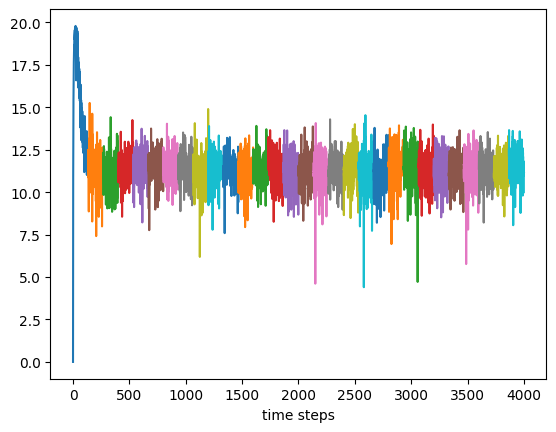

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

CHANNEL = 0
N_PIECE = 30

for piece_i in np.arange(0, N_PIECE):
    obj = pd.read_pickle(f"/gpfs/bbp.cscs.ch/data/scratch/proj68/laquitai/dataeng/0_silico/reyes_probe_lfp_4sec_2023_01_11/simulations/1/chunks/traces{piece_i}.pkl")
    plt.plot(obj[CHANNEL])
    plt.xlabel("voltage (mV)")
    plt.xlabel("time steps")

## Stack 133 ms chunks into a 4 secs simulation

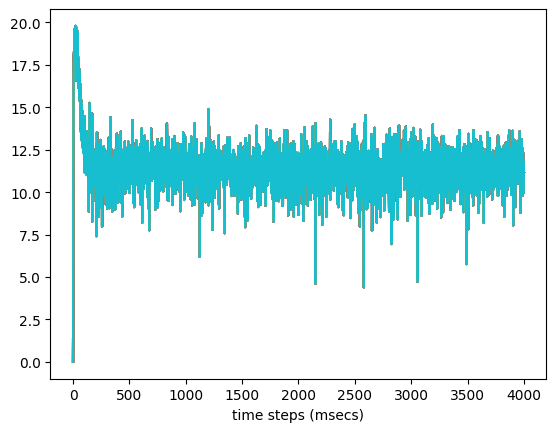

In [3]:
CHANNEL = 0
N_PIECE = 30

for piece_i in np.arange(0, N_PIECE):
    obj = pd.read_pickle(f"/gpfs/bbp.cscs.ch/data/scratch/proj68/laquitai/dataeng/0_silico/reyes_probe_lfp_4sec_2023_01_11/simulations/1/stacked/traces.pkl")
    plt.plot(obj[CHANNEL])
    plt.xlabel("voltage (mV)")
    plt.xlabel("time steps (msecs)")

### Stack 4 secs simulations into 40 sec campaign

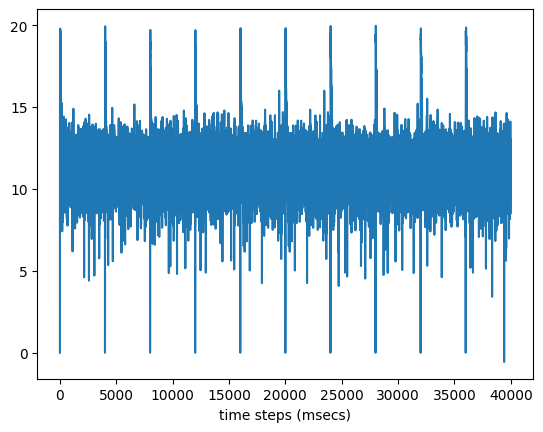

In [4]:
CHANNEL = 0

obj = pd.read_pickle(f"/gpfs/bbp.cscs.ch/data/scratch/proj68/laquitai/dataeng/0_silico/reyes_probe_lfp_4sec_2023_01_11/campaign/raw/traces.pkl");
plt.plot(obj[CHANNEL]);
plt.xlabel("voltage (mV)");
plt.xlabel("time steps (msecs)");